In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from collections import Counter

plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Cargar datos
train_df = pd.read_csv('Dataset-SupermarketImages/annotations.csv')
val_df = pd.read_csv('Dataset-SupermarketImages/annotations_val.csv')

print(f"Train: {len(train_df)} imágenes")
print(f"Validation: {len(val_df)} imágenes")
print(f"Total: {len(train_df) + len(val_df)} imágenes")

train_df.head()

Train: 900 imágenes
Validation: 50 imágenes
Total: 950 imágenes


,image,Banana,Orange,Red-Bell-Pepper,aluminium_form,bread,doritos_cocaCola,red_bull,shampoo_H&S,tea,yogurt_toni_mix
0,Productos/Train_Aumentado\Banana\aug_0_Banana_...,1,0,0,0,0,0,0,0,0,0
1,Productos/Train_Aumentado\Banana\aug_0_Banana_...,1,0,0,0,0,0,0,0,0,0
2,Productos/Train_Aumentado\Banana\aug_0_Banana_...,1,0,0,0,0,0,0,0,0,0
3,Productos/Train_Aumentado\Banana\aug_0_Banana_...,1,0,0,0,0,0,0,0,0,0
4,Productos/Train_Aumentado\Banana\aug_0_Banana_...,1,0,0,0,0,0,0,0,0,0


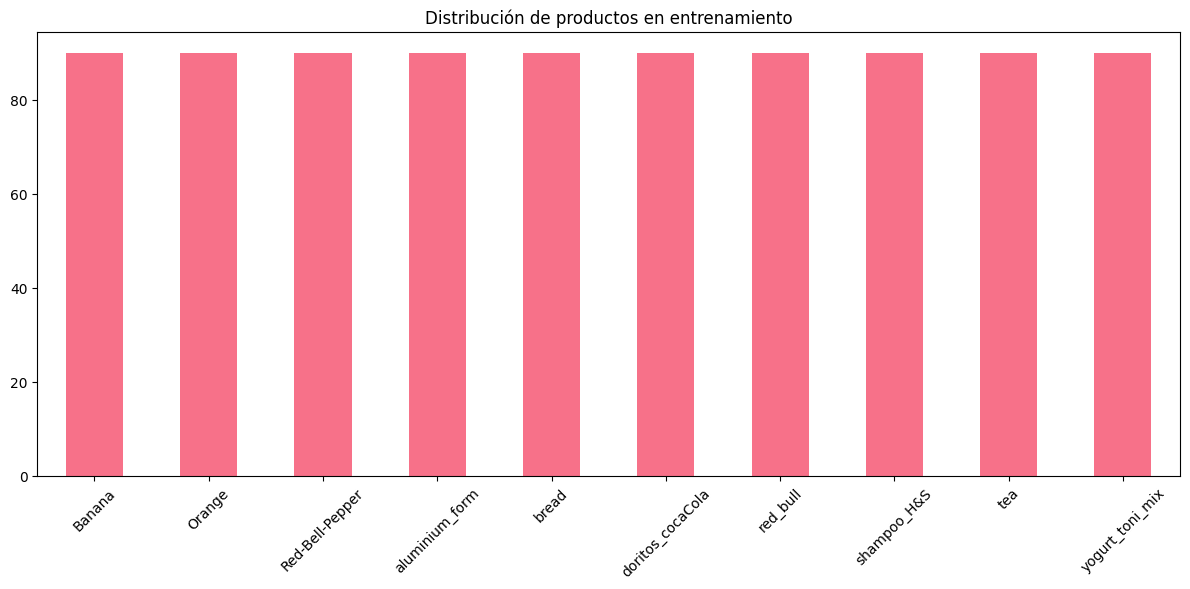

Productos más frecuentes:
Banana              90
Orange              90
Red-Bell-Pepper     90
aluminium_form      90
bread               90
doritos_cocaCola    90
red_bull            90
shampoo_H&S         90
tea                 90
yogurt_toni_mix     90
dtype: int64


In [3]:
# Distribución de clases
productos = train_df.columns[1:]
conteos = train_df[productos].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
conteos.plot(kind='bar')
plt.title('Distribución de productos en entrenamiento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Productos más frecuentes:")
print(conteos)

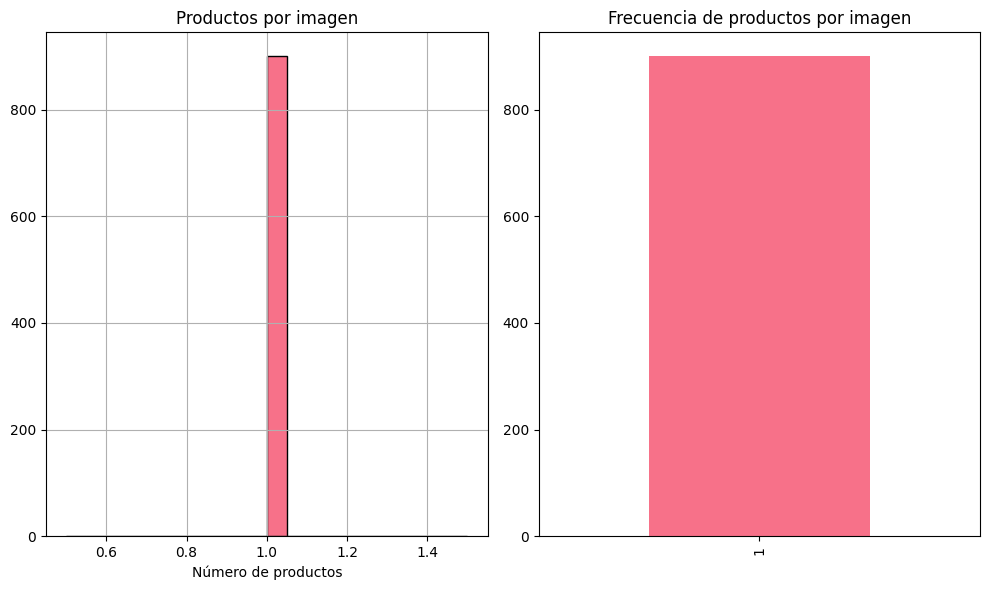

Promedio de productos por imagen: 1.00
Máximo productos en una imagen: 1
Imágenes sin productos: 0


In [4]:
# Número de productos por imagen
train_df['num_productos'] = train_df[productos].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
train_df['num_productos'].hist(bins=20, edgecolor='black')
plt.title('Productos por imagen')
plt.xlabel('Número de productos')

plt.subplot(1, 2, 2)
train_df['num_productos'].value_counts().sort_index().plot(kind='bar')
plt.title('Frecuencia de productos por imagen')
plt.tight_layout()
plt.show()

print(f"Promedio de productos por imagen: {train_df['num_productos'].mean():.2f}")
print(f"Máximo productos en una imagen: {train_df['num_productos'].max()}")
print(f"Imágenes sin productos: {sum(train_df['num_productos'] == 0)}")

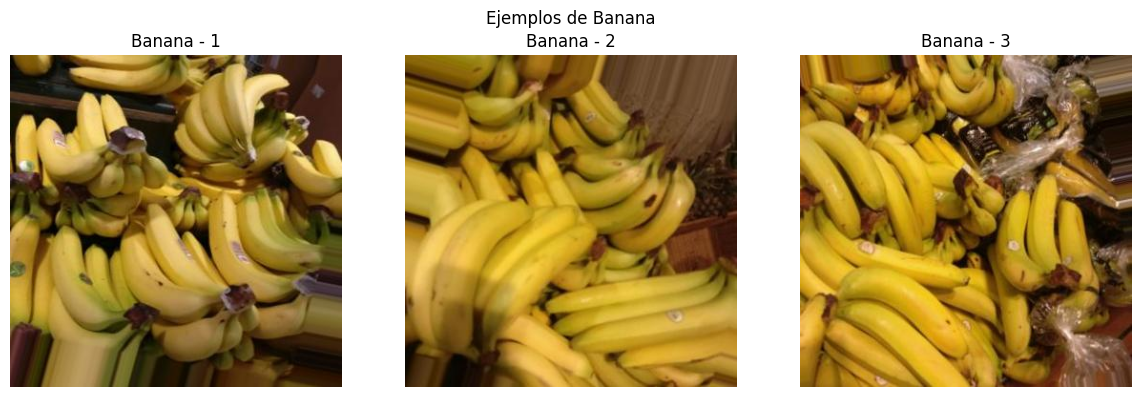

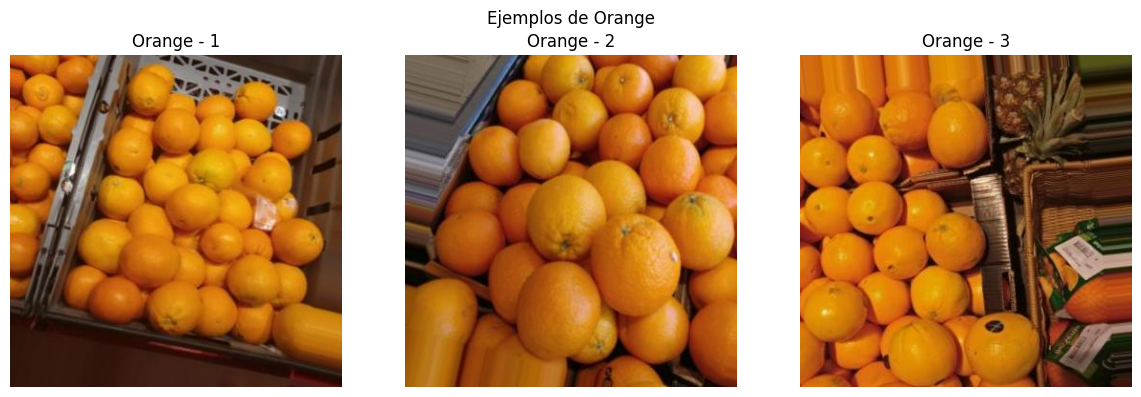

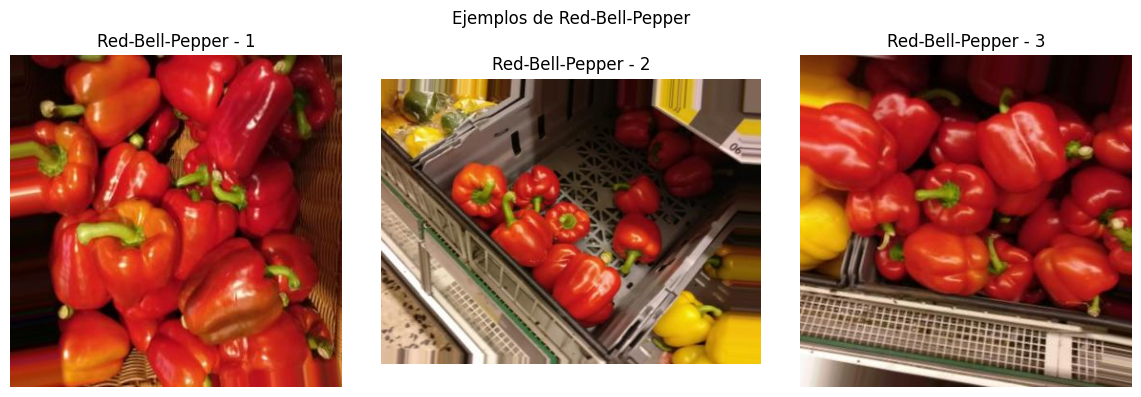

In [5]:
# Mostrar ejemplos de cada producto
def mostrar_ejemplos(producto, n=3):
    indices = train_df[train_df[producto] == 1].index[:n]
    
    plt.figure(figsize=(12, 4))
    for i, idx in enumerate(indices):
        img_path = f"Dataset-SupermarketImages/{train_df.iloc[idx]['image']}"
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{producto} - {i+1}")
    
    plt.suptitle(f'Ejemplos de {producto}')
    plt.tight_layout()
    plt.show()

# Mostrar ejemplos de los 3 productos más comunes
top_productos = conteos.head(3).index
for producto in top_productos:
    mostrar_ejemplos(producto)

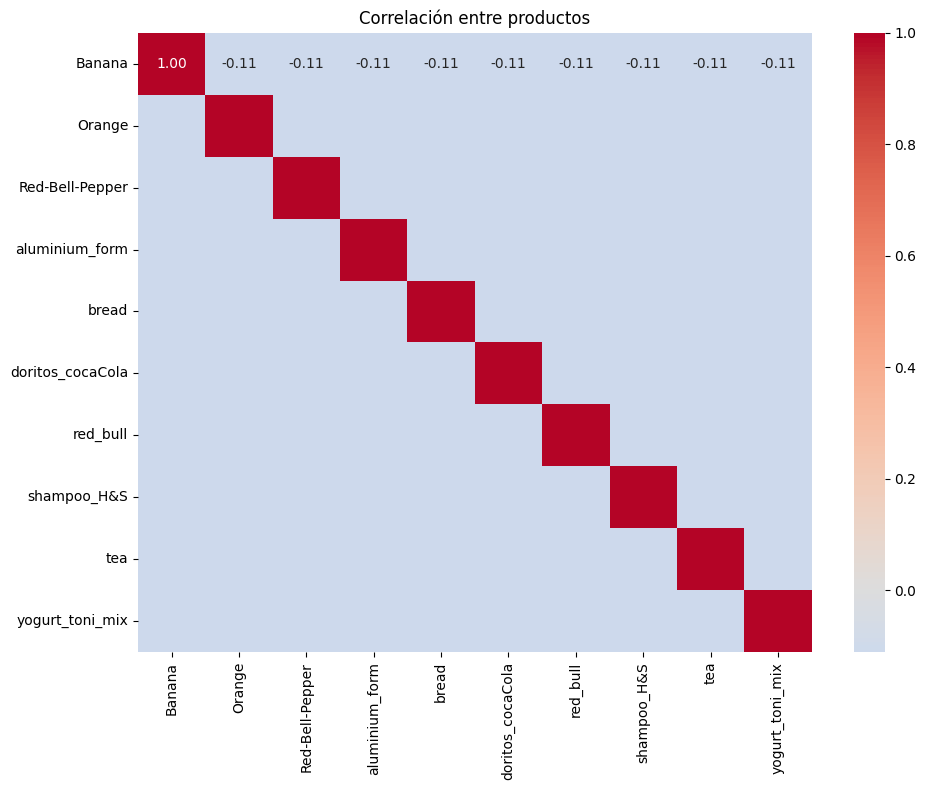

Productos que aparecen juntos:


In [6]:
# Correlación entre productos
corr_matrix = train_df[productos].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlación entre productos')
plt.tight_layout()
plt.show()

# Productos que aparecen juntos frecuentemente
correlaciones_altas = []
for i in range(len(productos)):
    for j in range(i+1, len(productos)):
        corr = corr_matrix.iloc[i, j]
        if corr > 0.1:
            correlaciones_altas.append((productos[i], productos[j], corr))

correlaciones_altas.sort(key=lambda x: x[2], reverse=True)
print("Productos que aparecen juntos:")
for prod1, prod2, corr in correlaciones_altas[:5]:
    print(f"{prod1} - {prod2}: {corr:.3f}")

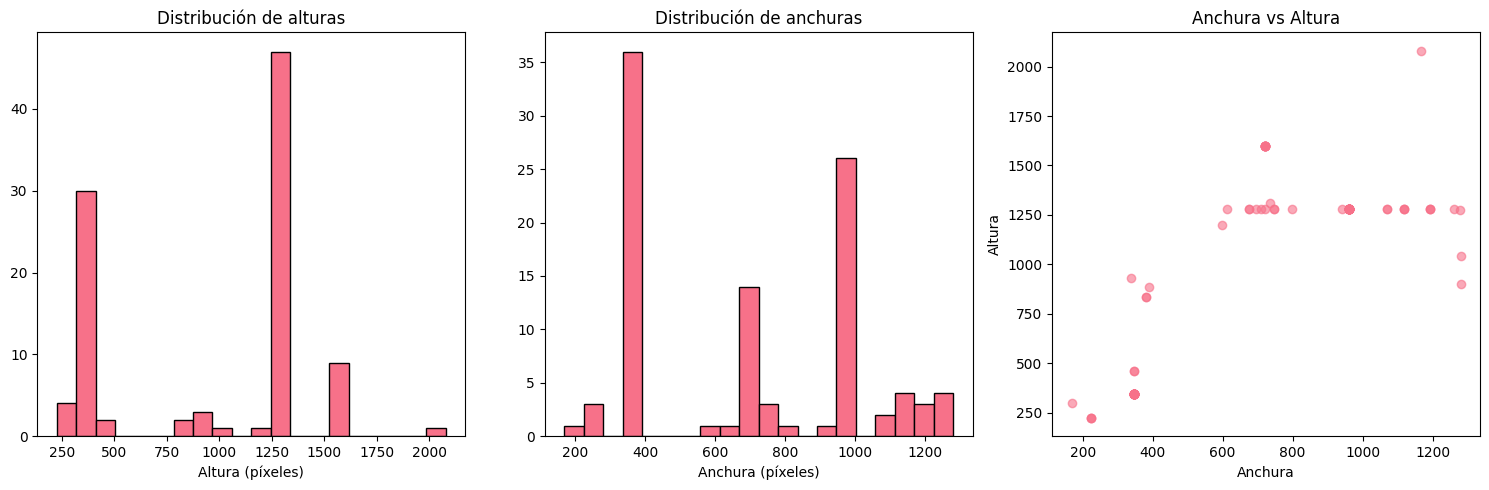

Altura promedio: 956 px
Anchura promedio: 689 px
Ratio promedio: 0.79


In [7]:
# Análisis de propiedades de imágenes
def analizar_imagenes(df, sample_size=100):
    alturas, anchuras, canales = [], [], []
    
    sample_indices = np.random.choice(len(df), min(sample_size, len(df)), replace=False)
    
    for idx in sample_indices:
        img_path = f"Dataset-SupermarketImages/{df.iloc[idx]['image']}"
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                h, w, c = img.shape
                alturas.append(h)
                anchuras.append(w)
                canales.append(c)
    
    return alturas, anchuras, canales

alturas, anchuras, canales = analizar_imagenes(train_df)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(alturas, bins=20, edgecolor='black')
plt.title('Distribución de alturas')
plt.xlabel('Altura (píxeles)')

plt.subplot(1, 3, 2)
plt.hist(anchuras, bins=20, edgecolor='black')
plt.title('Distribución de anchuras')
plt.xlabel('Anchura (píxeles)')

plt.subplot(1, 3, 3)
plt.scatter(anchuras, alturas, alpha=0.6)
plt.xlabel('Anchura')
plt.ylabel('Altura')
plt.title('Anchura vs Altura')

plt.tight_layout()
plt.show()

print(f"Altura promedio: {np.mean(alturas):.0f} px")
print(f"Anchura promedio: {np.mean(anchuras):.0f} px")
print(f"Ratio promedio: {np.mean(np.array(anchuras)/np.array(alturas)):.2f}")

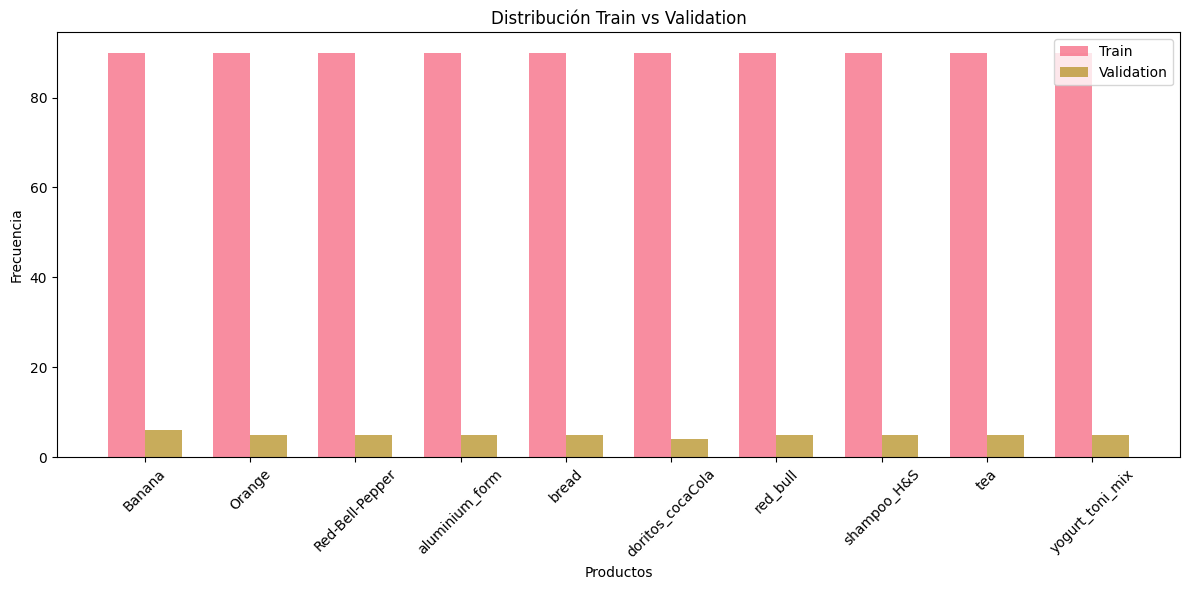

Diferencia porcentual entre train y val:
Banana: 93.3%
Orange: 94.4%
Red-Bell-Pepper: 94.4%
aluminium_form: 94.4%
bread: 94.4%
doritos_cocaCola: 95.6%
red_bull: 94.4%
shampoo_H&S: 94.4%
tea: 94.4%
yogurt_toni_mix: 94.4%


In [8]:
# Comparar distribución train vs validation
train_counts = train_df[productos].sum()
val_counts = val_df[productos].sum()

plt.figure(figsize=(12, 6))
x = np.arange(len(productos))
width = 0.35

plt.bar(x - width/2, train_counts, width, label='Train', alpha=0.8)
plt.bar(x + width/2, val_counts, width, label='Validation', alpha=0.8)

plt.xlabel('Productos')
plt.ylabel('Frecuencia')
plt.title('Distribución Train vs Validation')
plt.xticks(x, productos, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Porcentaje de diferencia
diff_percent = ((train_counts - val_counts) / train_counts * 100).abs()
print("Diferencia porcentual entre train y val:")
for producto, diff in diff_percent.items():
    print(f"{producto}: {diff:.1f}%")

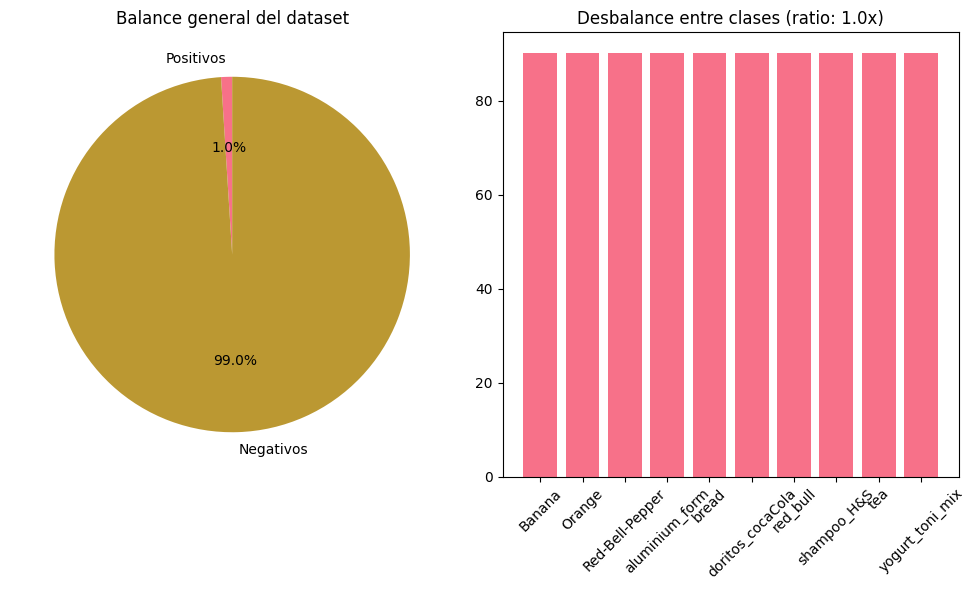

Resumen del dataset:
- Total de imágenes: 950
- Productos únicos: 10
- Ratio de balance: 0.010
- Desbalance máximo: 1.0x
- Producto más común: Banana (90 muestras)
- Producto menos común: Banana (90 muestras)


In [9]:
# Balance del dataset
total_samples = len(train_df) + len(val_df)
total_positives = train_df[productos].sum() + val_df[productos].sum()
total_negatives = total_samples * len(productos) - total_positives

balance_ratio = total_positives / (total_positives + total_negatives)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
labels = ['Positivos', 'Negativos']
sizes = [total_positives.sum(), total_negatives.sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Balance general del dataset')

plt.subplot(1, 2, 2)
imbalance_ratio = train_counts.max() / train_counts.min()
plt.bar(range(len(train_counts)), train_counts.values)
plt.xticks(range(len(productos)), productos, rotation=45)
plt.title(f'Desbalance entre clases (ratio: {imbalance_ratio:.1f}x)')
plt.tight_layout()
plt.show()

print("Resumen del dataset:")
print(f"- Total de imágenes: {total_samples}")
print(f"- Productos únicos: {len(productos)}")
print(f"- Ratio de balance: {balance_ratio.mean():.3f}")
print(f"- Desbalance máximo: {imbalance_ratio:.1f}x")
print(f"- Producto más común: {train_counts.idxmax()} ({train_counts.max()} muestras)")
print(f"- Producto menos común: {train_counts.idxmin()} ({train_counts.min()} muestras)")

In [ ]:
# Análisis del problema con doritos_cocaCola
print("Análisis de la clase combinada doritos_cocaCola:")
print(f"Imágenes con doritos_cocaCola: {train_df['doritos_cocaCola'].sum()}")

# Ver ejemplos de doritos_cocaCola
indices_doritos_coca = train_df[train_df['doritos_cocaCola'] == 1].index[:6]

plt.figure(figsize=(18, 6))
for i, idx in enumerate(indices_doritos_coca):
    img_path = f"Dataset-SupermarketImages/{train_df.iloc[idx]['image']}"
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"doritos_cocaCola - {i+1}")

plt.suptitle('Ejemplos de la clase doritos_cocaCola (¿ambos objetos presentes?)')
plt.tight_layout()
plt.show()

print("\nProblema identificado:")
print("- Una sola clase para dos objetos diferentes")
print("- El modelo no puede distinguir: 'solo Doritos', 'solo Coca-Cola', 'ambos'")
print("- Puede causar confusión en las predicciones")

In [ ]:
# Propuesta de mejora del etiquetado
print("OPCIONES PARA MEJORAR EL ETIQUETADO:")
print("\n1. OPCIÓN SEPARADA (Recomendada):")
print("   - Crear 'Doritos' como clase independiente")
print("   - Crear 'Coca_Cola' como clase independiente") 
print("   - Una imagen puede tener ambas etiquetas activas")

print("\n2. OPCIÓN COMPLETA:")
print("   - Mantener las clases individuales: 'Doritos', 'Coca_Cola'")
print("   - Mantener la clase combinada: 'doritos_cocaCola'")
print("   - Total: 3 etiquetas posibles")

print("\n3. ANÁLISIS DE QUÉ HACER:")

# Simular cómo sería la opción 1
def crear_etiquetas_separadas(df):
    df_nuevo = df.copy()
    
    # Crear nuevas columnas
    df_nuevo['Doritos'] = 0
    df_nuevo['Coca_Cola'] = 0
    
    # Las imágenes con doritos_cocaCola tendrán ambas etiquetas
    df_nuevo.loc[df_nuevo['doritos_cocaCola'] == 1, 'Doritos'] = 1
    df_nuevo.loc[df_nuevo['doritos_cocaCola'] == 1, 'Coca_Cola'] = 1
    
    # Eliminar la columna combinada
    df_nuevo = df_nuevo.drop('doritos_cocaCola', axis=1)
    
    return df_nuevo

# Mostrar cómo quedaría
df_mejorado = crear_etiquetas_separadas(train_df)
nuevas_columnas = ['Doritos', 'Coca_Cola']

print(f"\nCon etiquetas separadas:")
print(f"- Imágenes con Doritos: {df_mejorado['Doritos'].sum()}")
print(f"- Imágenes con Coca_Cola: {df_mejorado['Coca_Cola'].sum()}")
print(f"- Total de productos: {len(df_mejorado.columns[1:-1])} (antes: {len(productos)})")

# Comparar distribuciones
productos_nuevos = df_mejorado.columns[1:-1]  # Excluir 'image' y 'num_productos'
conteos_nuevos = df_mejorado[productos_nuevos].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
conteos_nuevos.plot(kind='bar')
plt.title('Distribución con etiquetas separadas (Opción 1)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n✅ RECOMENDACIÓN: Usar etiquetas separadas")
print("   - Más claro para el modelo")
print("   - Permite detectar objetos individuales")
print("   - Mejor para casos reales de uso")

In [ ]:
# Implementar la solución de etiquetas separadas
def generar_dataset_mejorado():
    # Cargar datos originales
    train_original = pd.read_csv('Dataset-SupermarketImages/annotations.csv')
    val_original = pd.read_csv('Dataset-SupermarketImages/annotations_val.csv')
    
    def separar_etiquetas(df):
        df_nuevo = df.copy()
        
        # Crear columnas para Doritos y Coca_Cola por separado
        df_nuevo['Doritos'] = 0
        df_nuevo['Coca_Cola'] = 0
        
        # Asignar etiquetas donde había doritos_cocaCola
        mask = df_nuevo['doritos_cocaCola'] == 1
        df_nuevo.loc[mask, 'Doritos'] = 1
        df_nuevo.loc[mask, 'Coca_Cola'] = 1
        
        # Eliminar la columna combinada
        df_nuevo = df_nuevo.drop('doritos_cocaCola', axis=1)
        
        return df_nuevo
    
    train_mejorado = separar_etiquetas(train_original)
    val_mejorado = separar_etiquetas(val_original)
    
    return train_mejorado, val_mejorado

# Generar los datasets mejorados
train_mejor, val_mejor = generar_dataset_mejorado()

# Guardar los nuevos archivos
train_mejor.to_csv('Dataset-SupermarketImages/annotations_mejorado.csv', index=False)
val_mejor.to_csv('Dataset-SupermarketImages/annotations_val_mejorado.csv', index=False)

print("✅ Datasets mejorados generados y guardados:")
print("- annotations_mejorado.csv")
print("- annotations_val_mejorado.csv")

# Mostrar la diferencia
productos_mejorados = train_mejor.columns[1:]
print(f"\nNuevas clases ({len(productos_mejorados)}):")
for i, producto in enumerate(productos_mejorados, 1):
    cantidad = train_mejor[producto].sum()
    print(f"{i:2d}. {producto}: {cantidad} imágenes")

# Comparación visual final
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Original
conteos.plot(kind='bar', ax=ax1, color='lightcoral')
ax1.set_title('Dataset Original')
ax1.set_xlabel('Productos')
ax1.set_ylabel('Frecuencia')
ax1.tick_params(axis='x', rotation=45)

# Mejorado
conteos_mejorados = train_mejor[productos_mejorados].sum().sort_values(ascending=False)
conteos_mejorados.plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Dataset Mejorado (Etiquetas Separadas)')
ax2.set_xlabel('Productos')
ax2.set_ylabel('Frecuencia')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\n📊 RESUMEN DE LA MEJORA:")
print(f"Antes: {len(productos)} clases → Después: {len(productos_mejorados)} clases")
print(f"Eliminado: 'doritos_cocaCola' → Añadido: 'Doritos' + 'Coca_Cola'")
print(f"Beneficio: El modelo puede detectar objetos individuales")

In [ ]:
# Análisis de opciones para multi-etiqueta real
print("OPCIONES PARA MULTI-ETIQUETA REAL:")
print("\n1. SEPARAR doritos_cocaCola (Más natural):")
print("   - Una imagen puede tener: Doritos=1, Coca_Cola=1 (ambos presentes)")
print("   - Otra imagen puede tener: Doritos=1, Coca_Cola=0 (solo Doritos)")
print("   - Es verdadero multi-etiqueta porque son objetos independientes")

print("\n2. CREAR COMBINACIONES NATURALES:")
print("   - Buscar imágenes que tengan múltiples productos naturalmente")
print("   - Ejemplo: Banana + Orange en la misma imagen")

# Analizar qué productos aparecen juntos naturalmente
print("\n3. ANÁLISIS DE COMBINACIONES ACTUALES:")

# Ver cuántas imágenes tienen múltiples productos
multi_producto = train_df[train_df['num_productos'] > 1]
print(f"Imágenes con múltiples productos: {len(multi_producto)}")

if len(multi_producto) > 0:
    print("\nEjemplos de combinaciones naturales:")
    for idx in multi_producto.index[:5]:
        productos_activos = []
        for col in productos:
            if train_df.loc[idx, col] == 1:
                productos_activos.append(col)
        print(f"Imagen {idx}: {productos_activos}")

# Verificar si hay otras combinaciones además de doritos_cocaCola
combinaciones_reales = 0
for idx in train_df.index:
    productos_en_imagen = train_df.loc[idx, productos].sum()
    if productos_en_imagen > 1:
        # Ver qué productos son
        productos_activos = []
        for col in productos:
            if train_df.loc[idx, col] == 1:
                productos_activos.append(col)
        
        # Solo contar si no es solo doritos_cocaCola
        if not (len(productos_activos) == 1 and productos_activos[0] == 'doritos_cocaCola'):
            combinaciones_reales += 1
            if combinaciones_reales <= 3:  # Mostrar solo los primeros 3
                print(f"Combinación real encontrada: {productos_activos}")

print(f"\nCombinaciones naturales encontradas: {combinaciones_reales}")

if combinaciones_reales == 0:
    print("\n❌ PROBLEMA: Solo doritos_cocaCola tiene múltiples objetos")
    print("   - No hay verdadero multi-etiqueta natural en el dataset")
    print("   - La opción de separar doritos_cocaCola es la mejor")
else:
    print(f"\n✅ BIEN: Hay {combinaciones_reales} combinaciones naturales además de doritos_cocaCola")

In [ ]:
# Estrategias para mejorar el multi-etiqueta
print("ESTRATEGIAS PARA AUMENTAR MULTI-ETIQUETA:")

print("\n📋 OPCIÓN A: Dataset mejorado (Separar doritos_cocaCola)")
train_sep = crear_etiquetas_separadas(train_df)
productos_sep = [col for col in train_sep.columns if col not in ['image', 'num_productos']]

# Recalcular num_productos para el dataset separado
train_sep['num_productos_nuevo'] = train_sep[productos_sep].sum(axis=1)
multi_separado = sum(train_sep['num_productos_nuevo'] > 1)
print(f"- Imágenes multi-etiqueta: {multi_separado}")
print(f"- Porcentaje multi-etiqueta: {multi_separado/len(train_sep)*100:.1f}%")

print("\n📋 OPCIÓN B: Crear combinaciones artificiales")
print("- Combinar imágenes de productos compatibles")
print("- Ejemplo: Fusionar imagen de Banana + imagen de Orange")

print("\n📋 OPCIÓN C: Re-etiquetar manualmente algunas imágenes")
print("- Revisar imágenes que podrían tener múltiples productos")
print("- Etiquetar productos que se pasaron por alto")

# Analizar productos que podrían aparecer juntos lógicamente
productos_comida = ['Banana', 'Orange', 'bread', 'yogurt_toni_mix']
productos_bebida = ['Coca_Cola']  # Ahora separado
productos_cuidado = ['shampoo_H&S']
productos_snacks = ['Doritos', 'tea']  # tea podría ser snack

print(f"\n📊 ANÁLISIS DE COMPATIBILIDAD:")
print(f"Productos de comida: {productos_comida}")
print(f"Productos de bebida: {productos_bebida}")
print(f"Productos de cuidado: {productos_cuidado}")
print(f"Productos snacks: {productos_snacks}")

# Verificar si hay imágenes que podrían tener combinaciones lógicas
def analizar_combinaciones_logicas():
    # Buscar imágenes que tengan productos que lógicamente podrían estar juntos
    combinaciones_posibles = [
        (['Banana', 'Orange'], 'Frutas juntas'),
        (['bread', 'yogurt_toni_mix'], 'Desayuno'),
        (['Doritos', 'Coca_Cola'], 'Snack + Bebida'),
    ]
    
    for productos_combo, descripcion in combinaciones_posibles:
        # Ver si hay imágenes que podrían tener esta combinación
        # (esto es especulativo, necesitaríamos revisar manualmente)
        print(f"- {descripcion}: {productos_combo}")

print("\n🔍 COMBINACIONES LÓGICAS POSIBLES:")
analizar_combinaciones_logicas()

print(f"\n💡 RECOMENDACIÓN FINAL:")
print(f"1. Usar la OPCIÓN A (separar doritos_cocaCola) para tener multi-etiqueta real")
print(f"2. Esto te dará {multi_separado} imágenes con múltiples etiquetas")
print(f"3. Es más natural y el modelo aprenderá mejor")
print(f"4. Puedes agregar más datos multi-etiqueta después si necesitas")

In [ ]:
# Solución final: Dataset multi-etiqueta mejorado
print("🎯 IMPLEMENTANDO SOLUCIÓN MULTI-ETIQUETA:")

def crear_dataset_multietiqueta_final():
    # Cargar datos originales
    train_orig = pd.read_csv('Dataset-SupermarketImages/annotations.csv')
    val_orig = pd.read_csv('Dataset-SupermarketImages/annotations_val.csv')
    
    def mejorar_etiquetas(df):
        df_final = df.copy()
        
        # 1. Separar doritos_cocaCola en Doritos y Coca_Cola
        df_final['Doritos'] = 0
        df_final['Coca_Cola'] = 0
        
        # Donde había doritos_cocaCola, ahora hay ambos
        mask = df_final['doritos_cocaCola'] == 1
        df_final.loc[mask, 'Doritos'] = 1
        df_final.loc[mask, 'Coca_Cola'] = 1
        
        # Eliminar la clase combinada
        df_final = df_final.drop('doritos_cocaCola', axis=1)
        
        return df_final
    
    train_final = mejorar_etiquetas(train_orig)
    val_final = mejorar_etiquetas(val_orig)
    
    return train_final, val_final

# Crear el dataset final
train_multietiqueta, val_multietiqueta = crear_dataset_multietiqueta_final()

# Guardar
train_multietiqueta.to_csv('Dataset-SupermarketImages/annotations_multietiqueta.csv', index=False)
val_multietiqueta.to_csv('Dataset-SupermarketImages/annotations_val_multietiqueta.csv', index=False)

# Análisis del resultado
productos_finales = [col for col in train_multietiqueta.columns if col != 'image']
train_multietiqueta['total_productos'] = train_multietiqueta[productos_finales].sum(axis=1)

# Estadísticas finales
total_imagenes = len(train_multietiqueta)
imagenes_multietiqueta = sum(train_multietiqueta['total_productos'] > 1)
imagenes_sin_productos = sum(train_multietiqueta['total_productos'] == 0)
imagenes_un_producto = sum(train_multietiqueta['total_productos'] == 1)

print(f"\n📊 ESTADÍSTICAS DEL DATASET MULTI-ETIQUETA FINAL:")
print(f"Total de imágenes: {total_imagenes}")
print(f"Imágenes sin productos: {imagenes_sin_productos} ({imagenes_sin_productos/total_imagenes*100:.1f}%)")
print(f"Imágenes con 1 producto: {imagenes_un_producto} ({imagenes_un_producto/total_imagenes*100:.1f}%)")
print(f"Imágenes multi-etiqueta: {imagenes_multietiqueta} ({imagenes_multietiqueta/total_imagenes*100:.1f}%)")
print(f"Total de clases: {len(productos_finales)}")

# Visualización final
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
categorias = ['Sin productos', '1 producto', 'Multi-etiqueta']
valores = [imagenes_sin_productos, imagenes_un_producto, imagenes_multietiqueta]
plt.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=90)
plt.title('Distribución por tipo de etiquetado')

plt.subplot(1, 3, 2)
train_multietiqueta['total_productos'].hist(bins=range(0, train_multietiqueta['total_productos'].max()+2), 
                                          edgecolor='black', alpha=0.7)
plt.xlabel('Número de productos por imagen')
plt.ylabel('Frecuencia')
plt.title('Productos por imagen')

plt.subplot(1, 3, 3)
conteos_finales = train_multietiqueta[productos_finales].sum().sort_values(ascending=False)
conteos_finales.plot(kind='bar')
plt.title('Distribución final de productos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"\n✅ DATASET MULTI-ETIQUETA GUARDADO:")
print(f"- annotations_multietiqueta.csv")
print(f"- annotations_val_multietiqueta.csv")

print(f"\n🎯 PARA USAR EN TU MODELO CNN:")
print(f"train_df = pd.read_csv('Dataset-SupermarketImages/annotations_multietiqueta.csv')")
print(f"val_df = pd.read_csv('Dataset-SupermarketImages/annotations_val_multietiqueta.csv')")

print(f"\n💡 BENEFICIOS:")
print(f"- Verdadero multi-etiqueta: una imagen puede tener Doritos=1 Y Coca_Cola=1")
print(f"- Más natural que una sola clase 'doritos_cocaCola'")
print(f"- El modelo aprende a detectar objetos independientes")
print(f"- {imagenes_multietiqueta} imágenes para entrenar multi-etiqueta")